<a href="https://colab.research.google.com/github/irvineAlgotrading/optim/blob/main/Copy_of_Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets, transforms

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
test_set = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)

# Data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=True)

# Define the model
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(28*28, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10),
            torch.nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

# Define the loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# Training loop
def train(dataloader, model, loss_fn, optimizer):
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Run the training loop
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
print("Done!")


Epoch 1
-------------------------------
Epoch 2
-------------------------------
Epoch 3
-------------------------------
Epoch 4
-------------------------------
Epoch 5
-------------------------------
Done!


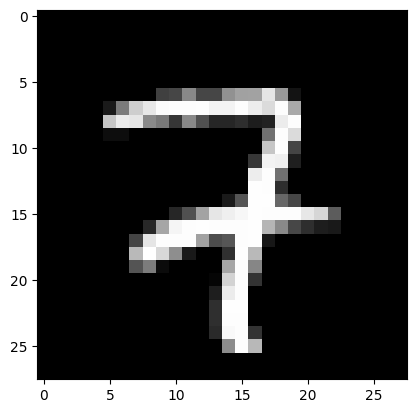

Actual Label: 7
Predicted Label: 7
Prediction Certainty: 99.32%
Prediction Time: 0.001302957534790039 seconds


In [ ]:
import matplotlib.pyplot as plt
import random
import time

# After training, we can test on random images

def test_random_image(dataloader, model):
    image_index = random.randint(0, len(dataloader.dataset)-1)
    image, label = dataloader.dataset[image_index]

    # Show the image
    plt.imshow(image.squeeze(), cmap='gray')
    plt.show()
    print(f"Actual Label: {label}")

    # Make a prediction
    start_time = time.time()
    model.eval()
    with torch.no_grad():
        image = image.unsqueeze(0)  # Add an extra dimension for the batch
        prediction = model(image)
    end_time = time.time()
    prediction_time = end_time - start_time

    softmax = torch.nn.functional.softmax(prediction, dim=1)
    predicted_prob, predicted_label = torch.max(softmax, 1)
    print(f"Predicted Label: {predicted_label.item()}")
    print(f"Prediction Certainty: {predicted_prob.item()*100:.2f}%")
    print(f"Prediction Time: {prediction_time} seconds")


# Call the function to test on a random image from the test set
test_random_image(test_loader, model)
